**Importing Libraries**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer # For Normalization
from sklearn.preprocessing import StandardScaler # For Standardization
from sklearn.decomposition import PCA

**Loading Data Set CIFAR 10 & Splitting it in train-test set**

Επειδή το cifar10 dataset είναι αρκερά μεγάλο επιλέγω να πάρω μόνο 10000 εικόνες τυχαία ως main dataset το οποίο θα το χωρίσω σε train-validation-test.

In [53]:
# loading cifar10 dataset
cifar10 = tf.keras.datasets.cifar10
(X, y), (X_test, y_test) = cifar10.load_data() # load cifar10

# combine train and test dataset
X_full = np.concatenate((X, X_test), axis=0)
y_full = np.concatenate((y, y_test), axis=0)

#select a random subset
subset_size = 10000
indices = np.random.choice(len(X_full), size=subset_size, replace=False)
X_full = X_full[indices]
y_full = y_full[indices]

# Split data into train-validation-test sets (60%-20%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.4,
                                                    random_state=0)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5,
                                                random_state=0)

**Visualizing dataset samples**

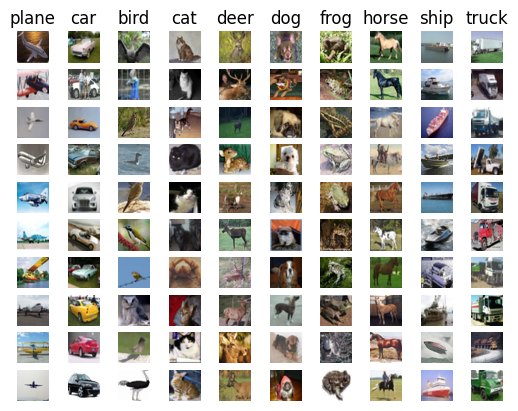

In [32]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 10
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

**Data Preprocessing**

Στάδιο προεπεξεργασίας των δεδομένων. Μετατρέπω τις εικόνες σε μονοδιάστατα διανύσματα και ελέγχω εαν η μετατροπή έγινε σωστά εμφανίζοντας το shape των δεδομένων.

In [54]:
# Reshaping Data into vectors
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
X_val = X_val.reshape(X_val.shape[0], -1)

print("X_train.shape: {}\ny_train.shape: {}\nX_test.shape: {}\ny_test.shape: {}\nX_val.shape: {}\ny_val.shape: {}".format(X_train.shape, y_train.shape,
                                                                                                                          X_test.shape, y_test.shape,
                                                                                                                          X_val.shape, y_val.shape))

X_train.shape: (6000, 3072)
y_train.shape: (6000, 1)
X_test.shape: (2000, 3072)
y_test.shape: (2000, 1)
X_val.shape: (2000, 3072)
y_val.shape: (2000, 1)


Βλέπω για διαφορετικά n_components πόσο ποσοστό της πληροφορίας μπορεί να διατηρηθεί μετά από μία πιθανή μείωση διάστασης με pca.

Text(0, 0.5, 'cumulative explained variance')

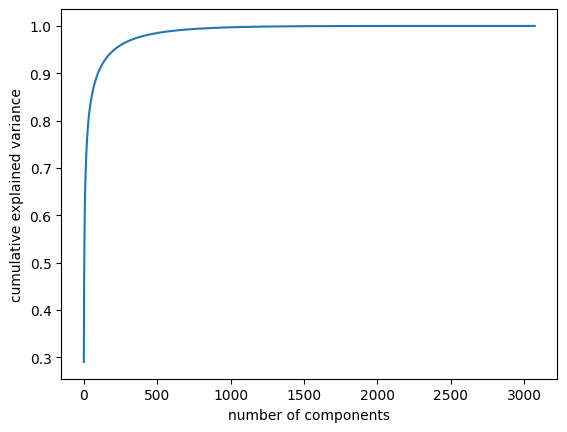

In [34]:
combined=np.vstack((X_train, X_val))

pca = PCA().fit(combined)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [35]:
print(pca.explained_variance_ratio_.cumsum()[50])
print(pca.explained_variance_ratio_.cumsum()[100])
print(pca.explained_variance_ratio_.cumsum()[150])
print(pca.explained_variance_ratio_.cumsum()[500]) # μεγάλη διατήρηση πληροφορίας αλλά μέτρια μείωση διάστασης

0.8452976176268099
0.902975977741812
0.9309056073038698
0.9850847923817015


Επιλέγω να κάνω τα Normalization/Standardization πριν την εφαρμογή του pca, ώστε όταν θα κάνω το pca όλα τα χαρακτηριστικά να συμβάλλουν ισότιμα στην δημιουργία του υπερεπιπέδου.

Standardization: Μετατρέπει τα δεδομένα σε κανονική κατανομή με μέση τιμή ίση με 0 και η τυπική απόκλιση ίση με 1 (mean=0 & std=1).

Normalization: Σε αυτή την περίπτωση τα δεδομένα απεικονίζονται σε ένα συγκριμένο έυρος 0 έως 1 και όλα τα χαρακτηριστικά έχουν την ίδια συνεισφορά.

In [55]:
# Check the data range before normalization/standardization process
np.min(X_train), np.max(X_train)

(0, 255)

In [56]:
# Standardization of data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

np.min(X_train), np.max(X_train)

(-2.229379450325523, 2.6112169049696616)

In [57]:
# pca for dimensionality reduction
pca_cifar = PCA(n_components=150)
X_train = pca_cifar.fit_transform(X_train)
X_val = pca_cifar.transform(X_val)
X_test = pca_cifar.transform(X_test)

print("X_train.shape: {}\ny_train.shape: {}\nX_test.shape: {}\ny_test.shape: {}\nX_val.shape: {}\ny_val.shape: {}".format(X_train.shape, y_train.shape,
                                                                                                                          X_test.shape, y_test.shape,
                                                                                                                          X_val.shape, y_val.shape))

X_train.shape: (6000, 150)
y_train.shape: (6000, 1)
X_test.shape: (2000, 150)
y_test.shape: (2000, 1)
X_val.shape: (2000, 150)
y_val.shape: (2000, 1)


Με μία forloop() δοκιμάζω για ένα εύρος γειτόνων από 1 έως 100 (k = {1, 100}) χωρίς να πειράξω τις υπόλοιπες παραμέτρους και εμφανίζω το k που δίνει την καλύτερη ακρίβεια.

Performing K-Nearest Neighbors (K-NN)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
accuracies = []
best_accuracy = 0
best_k = 0
yi = []

for i in range (1, 100):

  knn_model = KNeighborsClassifier(n_neighbors=i)
  knn_model.fit(X_train, y_train.ravel())
  knn_pred = knn_model.predict(X_test)
  acc = metrics.accuracy_score(y_test.ravel(), knn_pred)
  accuracies.append(acc)
  yi.append(i)

  if acc > best_accuracy:
    best_accuracy = acc
    best_k = i

print(f"Best accuracy: {best_accuracy} with n_neighbors = {best_k}")

Best accuracy: 0.303 with n_neighbors = 6


Κάνω plot για να δω την διακύμανση της ακρίβειας σε συνάρτηση με τον αριθμό των γειτόνων και παρατηρώ ότι καθώς αυξάνεται ο αριθμός των γειτόνων τόσο κατρακυλάει η ακρίβεια.

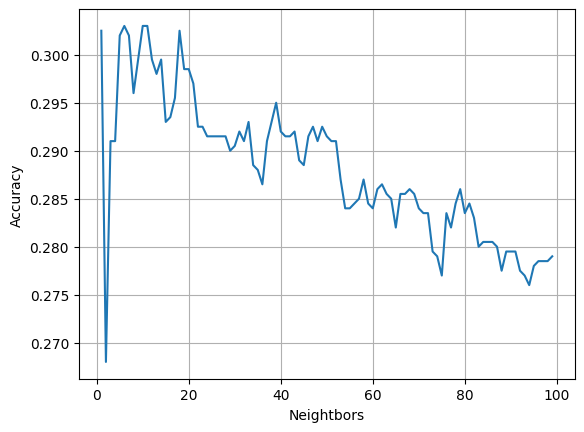

In [59]:
plt.plot( yi, accuracies)
plt.ylabel('Accuracy')
plt.xlabel('Neightbors')
plt.grid(True)
plt.show()

**Cross Validation** & **Prediction with the Best Model**

Κάνω 5-fold & 10-fold Cross Validation στον k-NN δοκιμάζοντας διαφορετικές παραμέτρους. Όσο αφορά στους γείτονες συμπεριλαμβάνω τον αριθμό των γειτόνων με την καλύερη ακρίβεια και 5 ακομα τιμές γύρω από την "καλύτερη" τιμή που βρήκαμε.


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

knn_model1 = KNeighborsClassifier()
param_grid1 = {
    'n_neighbors': [3, 6, 9, 12, 17, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search1 = GridSearchCV(knn_model1, param_grid1, cv=5, n_jobs=-1)

grid_search1.fit(X_train, y_train.ravel())

best_knn_model1 = grid_search1.best_estimator_
print("Best Hyperparameters:", best_knn_model1)

Best Hyperparameters: KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')


In [61]:
# Train set Accuracy
y_train_pred = best_knn_model1.predict(X_train)
train_accuracy = accuracy_score(y_train.ravel(), y_train_pred)
print("Train Set Accuracy:", train_accuracy)

# Validation set Accuracy
y_val_pred = best_knn_model1.predict(X_val)
val_accuracy = accuracy_score(y_val.ravel(), y_val_pred)
print("Validation Set Accuracy:", val_accuracy)

# Test set Accuracy
y_test_pred = best_knn_model1.predict(X_test)
test_accuracy = accuracy_score(y_test.ravel(), y_test_pred)
print("Test Set Accuracy:", test_accuracy)

Train Set Accuracy: 1.0
Validation Set Accuracy: 0.316
Test Set Accuracy: 0.3155


In [62]:
knn_model2 = KNeighborsClassifier()
param_grid2 = {
    'n_neighbors': [3, 6, 9, 12, 17, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search2 = GridSearchCV(knn_model2, param_grid2, cv=10, n_jobs=-1)

grid_search2.fit(X_train, y_train.ravel())

best_knn_model2 = grid_search2.best_estimator_
print("Best Hyperparameters:", best_knn_model2)

Best Hyperparameters: KNeighborsClassifier(metric='euclidean', n_neighbors=6, weights='distance')


In [63]:
# Train set Accuracy
y_train_pred = best_knn_model2.predict(X_train)
train_accuracy = accuracy_score(y_train.ravel(), y_train_pred)
print("Train Set Accuracy:", train_accuracy)

# Validation set Accuracy
y_val_pred = best_knn_model2.predict(X_val)
val_accuracy = accuracy_score(y_val.ravel(), y_val_pred)
print("Validation Set Accuracy:", val_accuracy)

# Test set Accuracy
y_test_pred = best_knn_model2.predict(X_test)
test_accuracy = accuracy_score(y_test.ravel(), y_test_pred)
print("Test Set Accuracy:", test_accuracy)

Train Set Accuracy: 1.0
Validation Set Accuracy: 0.316
Test Set Accuracy: 0.3155


Παρατηρώ οτι η ακρίβεια των validation-test set κυμαίνεται σε γενικές γραμμές στο 0.3. Επίσης παρατηρώ έντονα το φαινόμενο του overfitting καθώς βλέπουμε acc=1 στο train set ενώ στα validation-test ~0.3, άρα το μοντέλο δεν μπορεί να κάνει καλή γενίκευση σε άγνωστα δεδομένα.



Plot correct & incorrect prediction

In [64]:
import pandas as pd

knn_pred = best_knn_model1.predict(X_test)
knn_results = knn_pred[:20].ravel()
yTest_results = y_test[:20].ravel()

# DataFrame with predicted and actual values
results_df = pd.DataFrame({
    'Prediction': knn_results,
    'Actual Value': yTest_results
})

# print the dataframe
print(results_df)

    Prediction  Actual Value
0            2             6
1            8             8
2            6             3
3            6             6
4            2             9
5            6             2
6            8             1
7            1             1
8            6             3
9            8             4
10           4             2
11           2             6
12           6             0
13           9             4
14           4             8
15           4             2
16           6             4
17           4             7
18           0             9
19           9             9


In [65]:
# Create lists for correct and incorrect predictions
correct_predictions = []
incorrect_predictions = []

for i in range(len(knn_results)):
    if knn_results[i] == yTest_results[i]:
        correct_predictions.append(i)
    else:
        incorrect_predictions.append(i)

print("Correct Predictions:", correct_predictions)
print("Incorrect Predictions:", incorrect_predictions)

Correct Predictions: [1, 3, 7, 19]
Incorrect Predictions: [0, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


In [66]:
# Data reconstruction
X_test_reconstructed = pca_cifar.inverse_transform(X_test)

X_test_reconstructed = np.clip(X_test_reconstructed, 0, 1)
X_test_reconstructed = X_test_reconstructed.astype(np.float32)

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Class names
classesName = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Image preparation
def plt_img(x):
    nrow = 32
    ncol = 32
    ncolors = 3
    xsq = x.reshape((nrow, ncol, ncolors))
    plt.imshow(xsq)

# Number of images to plot (2 correct & 2 incorrect)
nplt = 2

# Plot correct predictions
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<ipython-input-68-5e373710c159>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = classesName[int(y_test[ind])]  # actual label


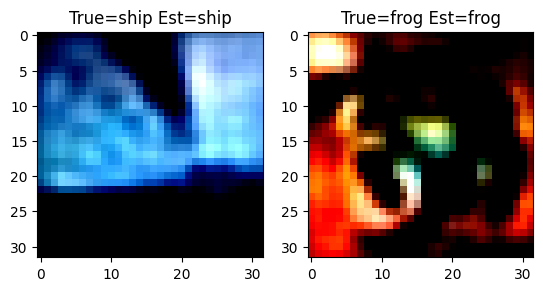

In [68]:
# Plot correct predictions
for i in range(nplt):
   plt.subplot(1, nplt, i + 1)
   ind = correct_predictions[i]  # select the correct sample
   plt_img(X_test_reconstructed[ind, :])  # use of reconstructed data for plotting

   # Actual and Predicted label
   true_label = classesName[int(y_test[ind])]  # actual label
   est_label = classesName[int(knn_pred[ind])]  # predicted label

   # Τίτλος εικόνας
   plt.title(f'True={true_label} Est={est_label}')

<ipython-input-69-1c8878859791>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_label = classesName[int(y_test[ind])]  # actual label


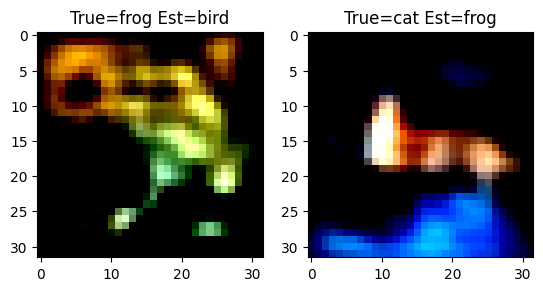

In [69]:
# Plot incorrect predictions
for i in range(nplt):
    plt.subplot(1, nplt, i + 1)
    ind = incorrect_predictions[i] # select the incorrect sample
    plt_img(X_test_reconstructed[ind, :]) # use of reconstructed data for plotting

    # Actual and Predicted label
    true_label = classesName[int(y_test[ind])]  # actual label
    est_label = classesName[int(knn_pred[ind])]  # predicted label

    # Τίτλος εικόνας
    plt.title(f'True={true_label} Est={est_label}')